In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget 'https://nlp.stanford.edu/data/glove.6B.zip'

--2021-01-21 19:47:12--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-01-21 19:47:12--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  1.99MB/s    in 6m 29s  

2021-01-21 19:53:41 (2.12 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [3]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [9]:
lines = ''
with open('glove.6B.50d.txt') as f:
    lines = f.readlines()
    lines = map(lambda x: x[:-1].split(' '), lines)
data = pd.DataFrame(lines)
data.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,the,0.418,0.24968,-0.41242,0.1217,0.34527,-0.044457,-0.49688,-0.17862,-0.00066023,-0.6566,0.27843,-0.14767,-0.55677,0.14658,-0.0095095,0.011658,0.10204,-0.12792,-0.8443,-0.12181,-0.016801,-0.33279,-0.1552,-0.23131,-0.19181,-1.8823,-0.76746,0.099051,-0.42125,-0.19526,4.0071,-0.18594,-0.52287,-0.31681,0.00059213,0.0074449,0.17778,-0.15897,0.012041,-0.054223,-0.29871,-0.15749,-0.34758,-0.045637,-0.44251,0.18785,0.0027849,-0.18411,-0.11514,-0.78581
1,",",0.013441,0.23682,-0.16899,0.40951,0.63812,0.47709,-0.42852,-0.55641,-0.364,-0.23938,0.13001,-0.063734,-0.39575,-0.48162,0.23291,0.090201,-0.13324,0.078639,-0.41634,-0.15428,0.10068,0.48891,0.31226,-0.1252,-0.037512,-1.5179,0.12612,-0.02442,-0.042961,-0.28351,3.5416,-0.11956,-0.014533,-0.1499,0.21864,-0.33412,-0.13872,0.31806,0.70358,0.44858,-0.080262,0.63003,0.32111,-0.46765,0.22786,0.36034,-0.37818,-0.56657,0.044691,0.30392
2,.,0.15164,0.30177,-0.16763,0.17684,0.31719,0.33973,-0.43478,-0.31086,-0.44999,-0.29486,0.16608,0.11963,-0.41328,-0.42353,0.59868,0.28825,-0.11547,-0.041848,-0.67989,-0.25063,0.18472,0.086876,0.46582,0.015035,0.043474,-1.4671,-0.30384,-0.023441,0.30589,-0.21785,3.746,0.0042284,-0.18436,-0.46209,0.098329,-0.11907,0.23919,0.1161,0.41705,0.056763,-6.3681e-05,0.068987,0.087939,-0.10285,-0.13931,0.22314,-0.080803,-0.35652,0.016413,0.10216
3,of,0.70853,0.57088,-0.4716,0.18048,0.54449,0.72603,0.18157,-0.52393,0.10381,-0.17566,0.078852,-0.36216,-0.11829,-0.83336,0.11917,-0.16605,0.061555,-0.012719,-0.56623,0.013616,0.22851,-0.14396,-0.067549,-0.38157,-0.23698,-1.7037,-0.86692,-0.26704,-0.2589,0.1767,3.8676,-0.1613,-0.13273,-0.68881,0.18444,0.0052464,-0.33874,-0.078956,0.24185,0.36576,-0.34727,0.28483,0.075693,-0.062178,-0.38988,0.22902,-0.21617,-0.22562,-0.093918,-0.80375
4,to,0.68047,-0.039263,0.30186,-0.17792,0.42962,0.032246,-0.41376,0.13228,-0.29847,-0.085253,0.17118,0.22419,-0.10046,-0.43653,0.33418,0.67846,0.057204,-0.34448,-0.42785,-0.43275,0.55963,0.10032,0.18677,-0.26854,0.037334,-2.0932,0.22171,-0.39868,0.20912,-0.55725,3.8826,0.47466,-0.95658,-0.37788,0.20869,-0.32752,0.12751,0.088359,0.16351,-0.21634,-0.094375,0.018324,0.21048,-0.03088,-0.19722,0.082279,-0.09434,-0.073297,-0.064699,-0.26044
5,and,0.26818,0.14346,-0.27877,0.016257,0.11384,0.69923,-0.51332,-0.47368,-0.33075,-0.13834,0.2702,0.30938,-0.45012,-0.4127,-0.09932,0.038085,0.029749,0.10076,-0.25058,-0.51818,0.34558,0.44922,0.48791,-0.080866,-0.10121,-1.3777,-0.10866,-0.23201,0.012839,-0.46508,3.8463,0.31362,0.13643,-0.52244,0.3302,0.33707,-0.35601,0.32431,0.12041,0.3512,-0.069043,0.36885,0.25168,-0.24517,0.25381,0.1367,-0.31178,-0.6321,-0.25028,-0.38097
6,in,0.33042,0.24995,-0.60874,0.10923,0.036372,0.151,-0.55083,-0.074239,-0.092307,-0.32821,0.09598,-0.82269,-0.36717,-0.67009,0.42909,0.016496,-0.23573,0.12864,-1.0953,0.43334,0.57067,-0.1036,0.20422,0.078308,-0.42795,-1.7984,-0.27865,0.11954,-0.12689,0.031744,3.8631,-0.17786,-0.082434,-0.62698,0.26497,-0.057185,-0.073521,0.46103,0.30862,0.12498,-0.48609,-0.0080272,0.031184,-0.36576,-0.42699,0.42164,-0.11666,-0.50703,-0.027273,-0.53285
7,a,0.21705,0.46515,-0.46757,0.10082,1.0135,0.74845,-0.53104,-0.26256,0.16812,0.13182,-0.24909,-0.44185,-0.21739,0.51004,0.13448,-0.43141,-0.03123,0.20674,-0.78138,-0.20148,-0.097401,0.16088,-0.61836,-0.18504,-0.12461,-2.2526,-0.22321,0.5043,0.32257,0.15313,3.9636,-0.71365,-0.67012,0.28388,0.21738,0.14433,0.25926,0.23434,0.4274,-0.44451,0.13813,0.36973,-0.64289,0.024142,-0.039315,-0.26037,0.12017,-0.043782,0.41013,0.1796
8,"""",0.25769,0.45629,-0.76974,-0.37679,0.59272,-0.063527,0.20545,-0.57385,-0.29009,-0.13662,0.32728,1.4719,-0.73681,-0.12036,0.71354,-0.46098,0.65248,0.48887,-0.51558,0.039951,-0.34307,-0.014087,0.86488,0.3546,0.7999,-1.4995,-1.8153,0.41128,0.23921,-0.43139,3.6623,-0.79834,-0.54538,0.16943,-0.82017,-0.3461,0.69495,-1.2256,-0.17992,-0.057474,0.030498,-0.395

In [20]:
vocab = ['red', 'color', 'paint', 'yellow', 'iran', 'france', 'italy', 'man', 'woman', 'queen', 'king']
selected = data.loc[data[0].isin(vocab)]
words = selected[0].values
vectors = selected.drop(0, axis=1).astype('float').values

In [21]:
A = vectors - vectors.mean(axis=0)
U, S, Vh = np.linalg.svd(A)
reduced = U[:, :2]

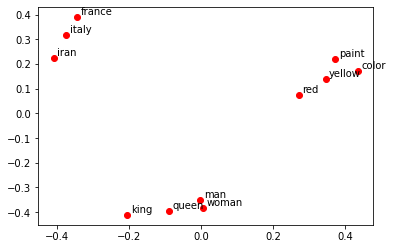

In [22]:
for i, item in enumerate(reduced):
    plt.scatter(item[0], item[1], c='r')
    plt.annotate(words[i], (item[0]+0.01, item[1]+0.01))